In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df_irwin.groupby('UBICACION')['TIPO_UNIDAD'].value_counts()

NameError: ignored

In [ ]:
archivo = '/content/drive/MyDrive/M3_Python/Embarques.xlsx'

df = pd.read_excel(archivo, sheet_name='Embarques')

df.head(5)


,GUIA,FECHA_DE_PEDIDO,FECHA_DE_EMBARQUE,DIAS_EMBARQUE,A_TIEMPO,ID_PEDIDO,FACTURA,IMPORTE_FACTURA,CLIENTE,COSIGNADO,...,COSTO_TOTAL_FLETE,TIPO_FLETE,NEGOCIO,LINEA_TRANSPORTE,STATUS,MES,UBICACION,CIUDAD,ESTADO,RUTA
0,2518,2006-01-02,2006-01-04,2,1,65854,409549,2369,H.E.B.,IZTAPALAPA,...,1100.0,LOCAL,HOGAR,TRANSPORTES TIGRE,ENTREGADO,2006-01-01,Centro,MEXICO,CD MEXICO,Local
1,2518,2006-01-02,2006-01-04,2,1,65855,409550,602,H.E.B.,IZTAPALAPA,...,0.0,LOCAL,HOGAR,TRANSPORTES TIGRE,ENTREGADO,2006-01-01,Centro,MEXICO,CD MEXICO,Local
2,2518,2006-01-02,2006-01-04,2,1,65856,409551,1498,H.E.B.,IZTAPALAPA,...,0.0,LOCAL,HOGAR,TRANSPORTES TIGRE,ENTREGADO,2006-01-01,Centro,MEXICO,CD MEXICO,Local
3,2518,2006-01-02,2006-01-04,2,1,65858,409552,696,H.E.B.,IZTAPALAPA,...,0.0,LOCAL,HOGAR,TRANSPORTES TIGRE,ENTREGADO,2006-01-01,Centro,MEXICO,CD MEXICO,Local
4,2518,2006-01-02,2006-01-04,2,1,65860,409553,2092,H.E.B.,IZTAPALAPA,...,0.0,LOCAL,HOGAR,TRANSPORTES TIGRE,ENTREGADO,2006-01-01,Centro,MEXICO,CD MEXICO,Local


Análisis exploratorio del conjunto de datos

## Estimados de locación y variabilidad

In [ ]:
df.shape

(4020, 27)

In [ ]:
df.columns

Index(['GUIA', 'FECHA_DE_PEDIDO', 'FECHA_DE_EMBARQUE', 'DIAS_EMBARQUE',
       'A_TIEMPO', 'ID_PEDIDO', 'FACTURA', 'IMPORTE_FACTURA', 'CLIENTE',
       'COSIGNADO', 'CAJAS', 'N_PIEZAS', 'TIPO_UNIDAD', 'TARIFA_CAMION',
       'TARIFA_PAQUETERIA', 'MANIOBRAS', 'REPARTOS', 'COSTO_TOTAL_FLETE',
       'TIPO_FLETE', 'NEGOCIO', 'LINEA_TRANSPORTE', 'STATUS', 'MES',
       'UBICACION', 'CIUDAD', 'ESTADO', 'RUTA'],
      dtype='object')

In [ ]:
df.dtypes

GUIA                          int64
FECHA_DE_PEDIDO      datetime64[ns]
FECHA_DE_EMBARQUE    datetime64[ns]
DIAS_EMBARQUE                 int64
A_TIEMPO                      int64
ID_PEDIDO                     int64
FACTURA                       int64
IMPORTE_FACTURA               int64
CLIENTE                      object
COSIGNADO                    object
CAJAS                         int64
N_PIEZAS                      int64
TIPO_UNIDAD                  object
TARIFA_CAMION               float64
TARIFA_PAQUETERIA           float64
MANIOBRAS                     int64
REPARTOS                      int64
COSTO_TOTAL_FLETE           float64
TIPO_FLETE                   object
NEGOCIO                      object
LINEA_TRANSPORTE             object
STATUS                       object
MES                  datetime64[ns]
UBICACION                    object
CIUDAD                       object
ESTADO                       object
RUTA                         object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4020 entries, 0 to 4019
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   GUIA               4020 non-null   int64         
 1   FECHA_DE_PEDIDO    4020 non-null   datetime64[ns]
 2   FECHA_DE_EMBARQUE  4020 non-null   datetime64[ns]
 3   DIAS_EMBARQUE      4020 non-null   int64         
 4   A_TIEMPO           4020 non-null   int64         
 5   ID_PEDIDO          4020 non-null   int64         
 6   FACTURA            4020 non-null   int64         
 7   IMPORTE_FACTURA    4020 non-null   int64         
 8   CLIENTE            4020 non-null   object        
 9   COSIGNADO          4020 non-null   object        
 10  CAJAS              4020 non-null   int64         
 11  N_PIEZAS           4020 non-null   int64         
 12  TIPO_UNIDAD        4020 non-null   object        
 13  TARIFA_CAMION      4020 non-null   float64       
 14  TARIFA_P

In [ ]:
df_2 = df.drop(columns=['COSIGNADO', 'STATUS','MES'])
df_2.head()


,GUIA,FECHA_DE_PEDIDO,FECHA_DE_EMBARQUE,DIAS_EMBARQUE,A_TIEMPO,ID_PEDIDO,FACTURA,IMPORTE_FACTURA,CLIENTE,CAJAS,...,MANIOBRAS,REPARTOS,COSTO_TOTAL_FLETE,TIPO_FLETE,NEGOCIO,LINEA_TRANSPORTE,UBICACION,CIUDAD,ESTADO,RUTA
0,2518,2006-01-02,2006-01-04,2,1,65854,409549,2369,H.E.B.,11,...,0,0,1100.0,LOCAL,HOGAR,TRANSPORTES TIGRE,Centro,MEXICO,CD MEXICO,Local
1,2518,2006-01-02,2006-01-04,2,1,65855,409550,602,H.E.B.,1,...,0,0,0.0,LOCAL,HOGAR,TRANSPORTES TIGRE,Centro,MEXICO,CD MEXICO,Local
2,2518,2006-01-02,2006-01-04,2,1,65856,409551,1498,H.E.B.,5,...,0,0,0.0,LOCAL,HOGAR,TRANSPORTES TIGRE,Centro,MEXICO,CD MEXICO,Local
3,2518,2006-01-02,2006-01-04,2,1,65858,409552,696,H.E.B.,2,...,0,0,0.0,LOCAL,HOGAR,TRANSPORTES TIGRE,Centro,MEXICO,CD MEXICO,Local
4,2518,2006-01-02,2006-01-04,2,1,65860,409553,2092,H.E.B.,7,...,0,0,0.0,LOCAL,HOGAR,TRANSPORTES TIGRE,Centro,MEXICO,CD MEXICO,Local


EL tiempo máximo de entrega de pedidos es de 2 días

In [ ]:
print(df['DIAS_EMBARQUE'].mean())

6.491542288557214


Filtrando la línea de negocio de herramientas "IRWIN"

In [ ]:
df_irwin = df[df['NEGOCIO'] == 'IRWIN']
print(df_irwin['DIAS_EMBARQUE'].mean())

10.689826302729529


In [ ]:
df_irwin['DIAS_EMBARQUE'].std()

15.53468542862899

In [ ]:
df_irwin['DIAS_EMBARQUE'].min()

0

In [ ]:
df_irwin['DIAS_EMBARQUE'].max()

98

In [ ]:
df_irwin['DIAS_EMBARQUE'].max() - df_irwin['DIAS_EMBARQUE'].min()

98

In [ ]:
df_irwin['DIAS_EMBARQUE'].quantile(0.8)

17.0

In [ ]:
print(f"Mínimo: {df_irwin['DIAS_EMBARQUE'].min()}")
print(f"Percentil 10: {df_irwin['DIAS_EMBARQUE'].quantile(0.1)}")
print(f"Percentil 25: {df_irwin['DIAS_EMBARQUE'].quantile(0.25)}")
print(f"Percentil 50: {df_irwin['DIAS_EMBARQUE'].median()}")
print(f"Percentil 75: {df_irwin['DIAS_EMBARQUE'].quantile(0.75)}")
print(f"Percentil 90: {df_irwin['DIAS_EMBARQUE'].quantile(0.9)}")
print(f"Percentil 95: {df_irwin['DIAS_EMBARQUE'].quantile(0.95)}")
print(f"Máximo: {df_irwin['DIAS_EMBARQUE'].max()}")

Mínimo: 0
Percentil 10: 1.0
Percentil 25: 2.0
Percentil 50: 4.0
Percentil 75: 15.0
Percentil 90: 27.90000000000009
Percentil 95: 37.0
Máximo: 98


## Distribuciones de Datos

Tabla de frecuencias

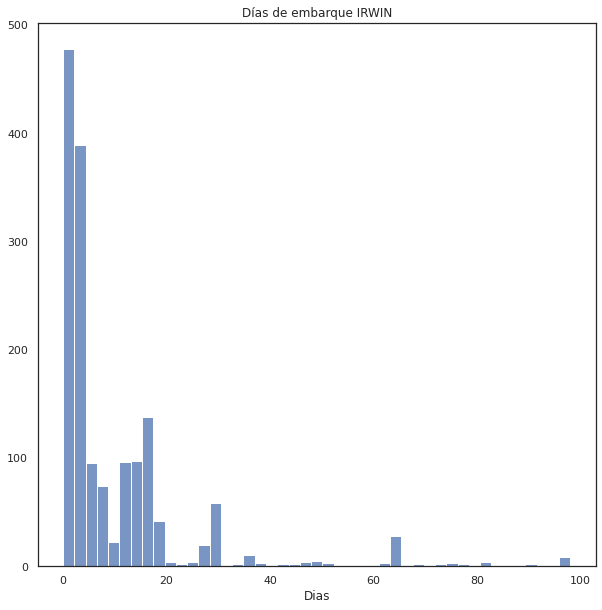

In [ ]:
plt.figure(figsize=(10, 10))
ax = sns.histplot(df_irwin['DIAS_EMBARQUE']);
ax.set(title="Días de embarque IRWIN", xlabel="Dias", ylabel="");

Filtrando la linea de negocio de plásticos "HOGAR"

In [ ]:
df_hogar = df[df['NEGOCIO'] == 'HOGAR']
df_hogar
print(df_hogar['DIAS_EMBARQUE'].mean())

3.681063122923588


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


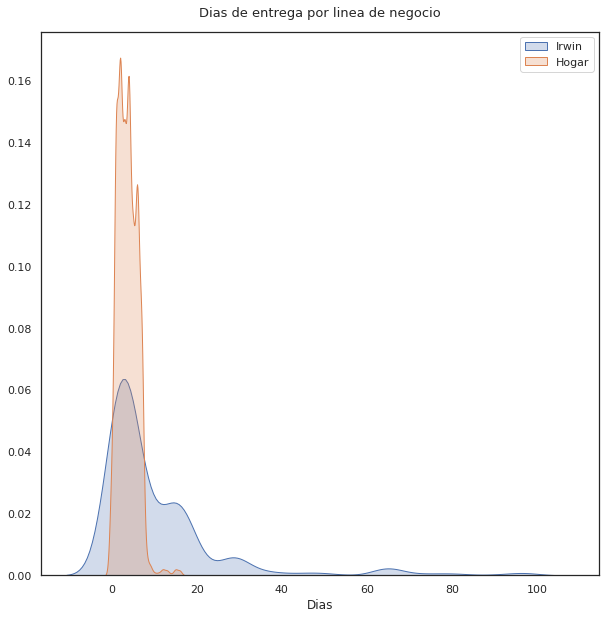

In [ ]:
plt.figure(figsize=(10, 10))
ax = sns.distplot(df_irwin["DIAS_EMBARQUE"], hist=False, label="Irwin", kde_kws= {"shade":True})
sns.distplot(df_hogar["DIAS_EMBARQUE"], hist=False, label="Hogar", kde_kws= {"shade": True});
ax.set_title("Dias de entrega por linea de negocio", fontsize=13, pad=15)
ax.set(xlabel="Dias", ylabel="")
ax.legend(loc="upper right")

In [ ]:
df_no_repetition = df_irwin.groupby('RUTA')[["DIAS_EMBARQUE", "IMPORTE_FACTURA", "CAJAS"]].mean()
df_no_repetition.head()

,DIAS_EMBARQUE,IMPORTE_FACTURA,CAJAS
RUTA,,,
Bajío I,24.100000,5556.800000,1.566667
Bajío II,24.904762,8946.547619,2.404762
Centro_Occidente,28.100000,9568.200000,5.300000
Golfo I,8.428571,6877.142857,1.571429
Golfo II,3.200000,4483.000000,1.300000


In [ ]:
df_entrega_irwin = df_irwin.groupby('RUTA')['A_TIEMPO'].last()

In [ ]:
df_merged = df_no_repetition.merge(df_entrega_irwin, left_index=True, right_index=True)
df_merged.head()

,DIAS_EMBARQUE,IMPORTE_FACTURA,CAJAS,A_TIEMPO
RUTA,,,,
Bajío I,24.100000,5556.800000,1.566667,0
Bajío II,24.904762,8946.547619,2.404762,0
Centro_Occidente,28.100000,9568.200000,5.300000,1
Golfo I,8.428571,6877.142857,1.571429,0
Golfo II,3.200000,4483.000000,1.300000,1


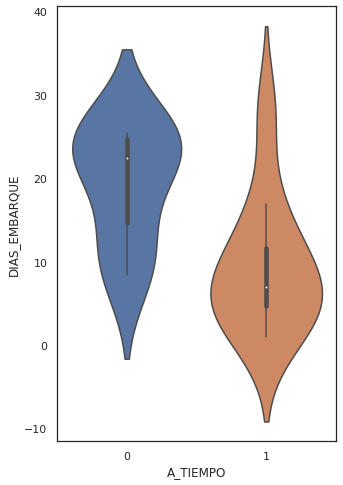

In [ ]:
plt.figure(figsize=(5, 8))
sns.violinplot(data=df_merged, x='A_TIEMPO', y='DIAS_EMBARQUE');

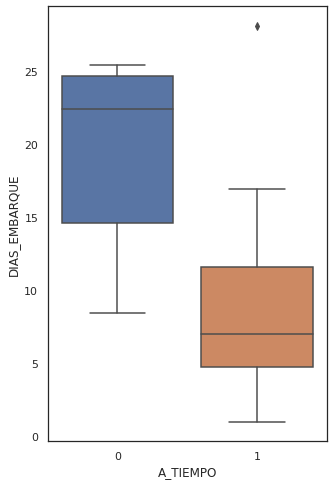

In [ ]:
plt.figure(figsize=(5, 8))
sns.boxplot(data=df_merged, x='A_TIEMPO', y='DIAS_EMBARQUE');

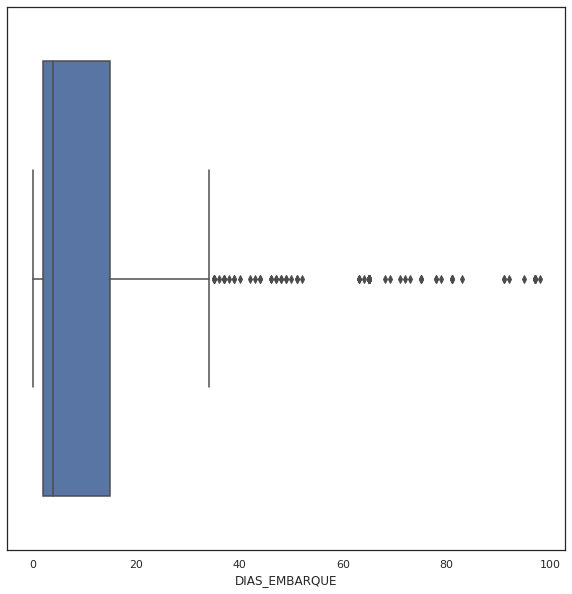

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(x=df_irwin['DIAS_EMBARQUE']);

In [ ]:
transp_irwin = df_irwin["LINEA_TRANSPORTE"].value_counts()
print(transp_irwin)

TRANSPORTES TIGRE        209
TRANSPORTES MEJIA        194
TRANSPORTES OLIVARES     191
TRANSPORTES MARSA        147
TRANSPORTES CORTES       129
TRANSPORTES SANCHEZ      126
TRANSPORTES PEREZ        118
TRANSPORTES QUINTANAR    104
TRANSPORTES ZEPEDA        89
TRANSPORTES ORTIZ         82
TRANSPORTES LEDESMA       50
TRANSPORTES  GARCIA       49
TRANSPORTES RODRIGUEZ     25
TRANSPORTES GM            23
TRANSPORTES RUIZ          23
TRANSPORTES VALENCIA      14
TRANSPORTES ARACELY        8
TRANSPORTES MCM            6
TRANSPORTES SPEED          6
TRANSPORTES SANDY          4
TRANSPORTE QUINTANAR       4
TRANSPORTES CHAVARRIA      3
CLIENTE RECOGE             2
TRANSPORTES TAFOLLA        2
TRANSPORTES OSVALDO        2
TRANSPORTES GRCIA          1
BLANCA                     1
Name: LINEA_TRANSPORTE, dtype: int64


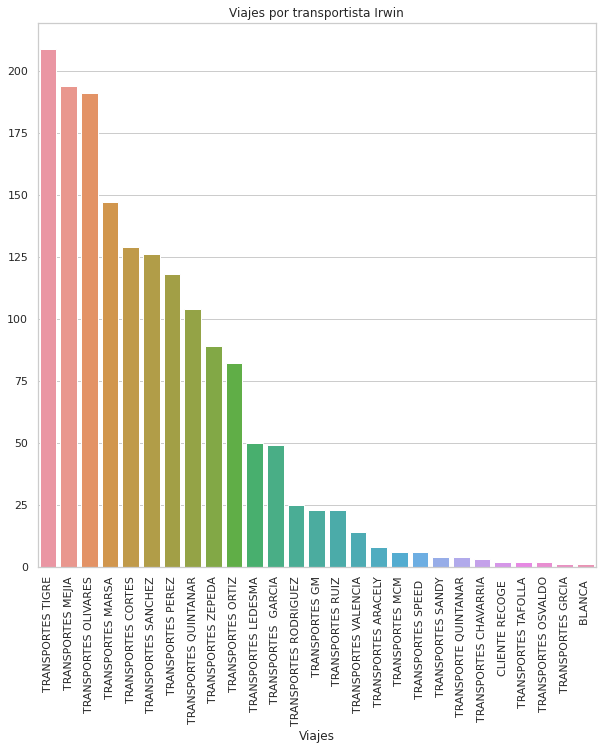

In [ ]:
plt.figure(figsize=(10, 10))
ax = sns.barplot(x=transp_irwin.index, y=transp_irwin);
ax.set_title("Viajes por transportista Irwin")
ax.set(xlabel="Viajes")
ax.set(ylabel="");
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

In [ ]:
counts_percentage_irwin = transp_irwin * 100 / transp_irwin.sum()

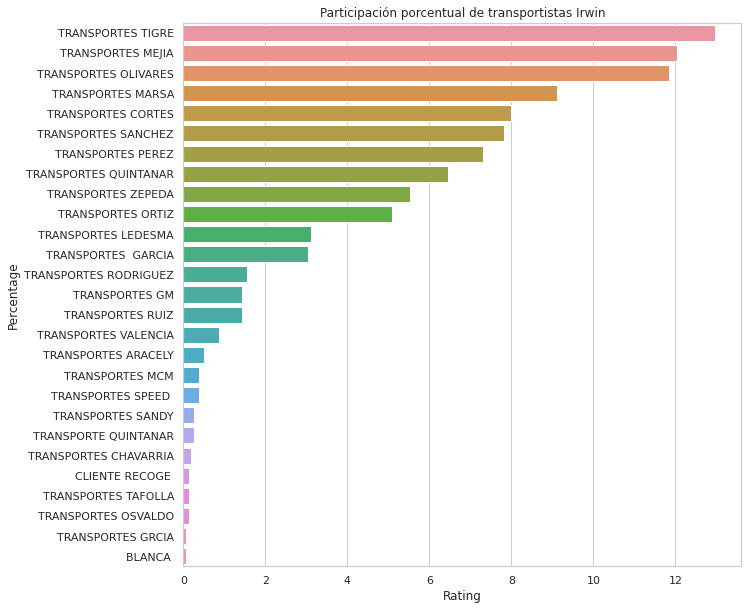

In [ ]:
plt.figure(figsize=(10, 10))
ax = sns.barplot(x=counts_percentage_irwin, y=transp_irwin.index);
ax.set_title("Participación porcentual de transportistas Irwin")
ax.set(xlabel="Rating")
ax.set(ylabel="Percentage");


In [ ]:
df_irwin.groupby('UBICACION')['TIPO_UNIDAD'].value_counts()

UBICACION  TIPO_UNIDAD
Centro     CAMIONETA      1274
           TRAILER         162
           TORTON           44
Norte      CAMIONETA        60
           TORTON            9
           TRAILER           8
Sur        CAMIONETA        49
           TORTON            5
           MUDANZA           1
Name: TIPO_UNIDAD, dtype: int64

In [ ]:
pd.crosstab(df_irwin['RUTA'], [df_irwin['A_TIEMPO'], df_irwin['UBICACION']], margins=True, margins_name="Total")

A_TIEMPO              0                1           Total
UBICACION        Centro Norte Sur Centro Norte Sur      
RUTA                                                    
Bajío I              21     0   0      9     0   0    30
Bajío II             30     0   0     12     0   0    42
Centro_Occidente      7     0   0      3     0   0    10
Golfo I               0     0   9      0     0   5    14
Golfo II              0     0   4      0     0   6    10
Local               724     0   0    660     0   0  1384
Norte                 0    12   0      0     9   0    21
Norte_Centro          0    12   0      0    18   0    30
Occidente            10     0   0      4     0   0    14
Pacifico I            0     5   0      0     4   0     9
Pacifico II           0     4   0      0     3   0     7
Pacífico_Norte        0     0   0      0     2   0     2
Paquetería            0     4   0      0     4   0     8
Península             0     0   2      0     0   3     5
Sur I                 0     0  11      0     0   8    19
Sureste               0     0   2      0     0   5     7
Total               792    37  28    688    40  27  1612

In [ ]:
crosstab = pd.crosstab(df_irwin['A_TIEMPO'], df_irwin['UBICACION'])
crosstab

UBICACION,Centro,Norte,Sur
A_TIEMPO,,,
0,792,37,28
1,688,40,27


In [ ]:
crosstab.stack(level=0)

A_TIEMPO  UBICACION
0         Centro       792
          Norte         37
          Sur           28
1         Centro       688
          Norte         40
          Sur           27
dtype: int64

In [ ]:
crosstab.loc[0]

UBICACION
Centro    792
Norte      37
Sur        28
Name: 0, dtype: int64

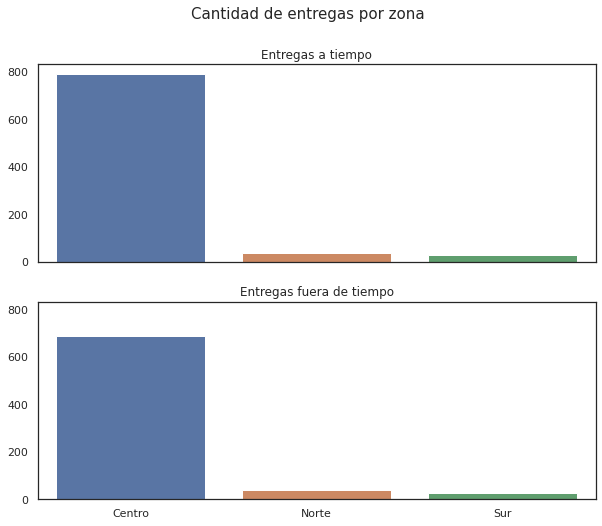

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True, sharey=True);

sns.barplot(x=crosstab.columns, y=crosstab.loc[0], ax=axes[0]);
sns.barplot(x=crosstab.columns, y=crosstab.loc[1], ax=axes[1])

axes[0].set(xlabel='', ylabel='', title="Entregas a tiempo")
axes[1].set(xlabel='', ylabel='', title="Entregas fuera de tiempo");

fig.suptitle("Cantidad de entregas por zona", fontsize=15);

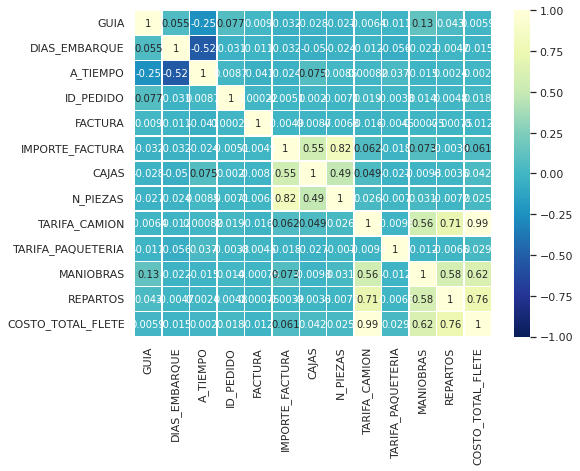

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(df_irwin.corr(), vmin=-1, vmax=1, annot=True, linewidths=.5, cmap="YlGnBu_r")

In [ ]:
df_irwin_filtered = df.drop(columns=['GUIA', 'FECHA_DE_PEDIDO','FECHA_DE_EMBARQUE', 'A_TIEMPO', 'ID_PEDIDO','FACTURA' ,'CLIENTE', 
                                     'COSIGNADO', 'TIPO_FLETE', 'NEGOCIO', 'LINEA_TRANSPORTE' ,
                                     'STATUS','MES', 'UBICACION', 'CIUDAD', 'ESTADO', 'RUTA', 'TARIFA_CAMION', 'N_PIEZAS',
                                     'REPARTOS', 'MANIOBRAS','TARIFA_PAQUETERIA'])
df_irwin_filtered.head(5)

,DIAS_EMBARQUE,IMPORTE_FACTURA,CAJAS,TIPO_UNIDAD,COSTO_TOTAL_FLETE
0,2,2369,11,TORTON,1100.0
1,2,602,1,TORTON,0.0
2,2,1498,5,TORTON,0.0
3,2,696,2,TORTON,0.0
4,2,2092,7,TORTON,0.0


In [ ]:
df_irwin_filtered.corr()

,DIAS_EMBARQUE,IMPORTE_FACTURA,CAJAS,COSTO_TOTAL_FLETE
DIAS_EMBARQUE,1.000000,-0.002463,-0.084665,-0.028256
IMPORTE_FACTURA,-0.002463,1.000000,0.370676,0.183998
CAJAS,-0.084665,0.370676,1.000000,0.326140
COSTO_TOTAL_FLETE,-0.028256,0.183998,0.326140,1.000000


In [ ]:
df_irwin.corr()

,GUIA,DIAS_EMBARQUE,A_TIEMPO,ID_PEDIDO,FACTURA,IMPORTE_FACTURA,CAJAS,N_PIEZAS,TARIFA_CAMION,TARIFA_PAQUETERIA,MANIOBRAS,REPARTOS,COSTO_TOTAL_FLETE
GUIA,1.000000,0.055075,-0.248655,0.076638,0.009012,-0.032393,-0.028148,-0.026665,-0.006400,-0.011147,0.126639,0.043135,0.005905
DIAS_EMBARQUE,0.055075,1.000000,-0.516236,-0.030736,-0.011421,-0.031758,-0.049613,-0.023985,-0.012199,-0.055668,-0.021842,-0.004660,-0.014854
A_TIEMPO,-0.248655,-0.516236,1.000000,0.008667,-0.040766,-0.023552,0.074729,0.008517,0.000815,0.036940,-0.014921,0.002368,0.001983
ID_PEDIDO,0.076638,-0.030736,0.008667,1.000000,0.000216,-0.005114,0.002030,-0.007095,0.019015,-0.003827,0.013751,0.004801,0.018305
FACTURA,0.009012,-0.011421,-0.040766,0.000216,1.000000,-0.004904,-0.008713,-0.006822,-0.015798,-0.004532,-0.000754,-0.000750,-0.011968
IMPORTE_FACTURA,-0.032393,-0.031758,-0.023552,-0.005114,-0.004904,1.000000,0.554882,0.822735,0.061931,-0.018199,0.073157,-0.003938,0.060748
CAJAS,-0.028148,-0.049613,0.074729,0.002030,-0.008713,0.554882,1.000000,0.486159,0.049067,-0.027265,-0.009848,-0.003539,0.042253
N_PIEZAS,-0.026665,-0.023985,0.008517,-0.007095,-0.006822,0.822735,0.486159,1.000000,0.025922,-0.007008,0.030884,-0.007153,0.025082
TARIFA_CAMION,-0.006400,-0.012199,0.000815,0.019015,-0.015798,0.061931,0.049067,0.025922,1.000000,-0.009761,0.557922,0.711559,0.993721
TARIFA_PAQUETERIA,-0.011147,-0.055668,0.036940,-0.003827,-0.004532,-0.018199,-0.027265,-0.007008,-0.009761,1.000000,-0.012194,-0.006481,0.028955


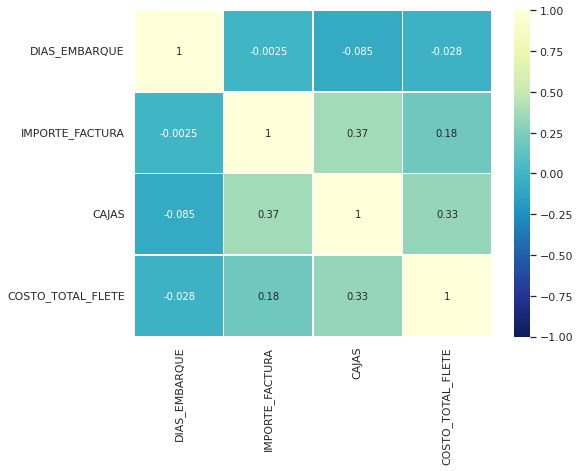

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(df_irwin_filtered.corr(), vmin=-1, vmax=1, annot=True, linewidths=.5, cmap="YlGnBu_r")

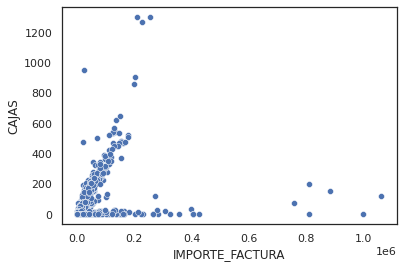

In [ ]:
sns.scatterplot(x=df_irwin_filtered['IMPORTE_FACTURA'], y=df_irwin_filtered['CAJAS']);

In [ ]:
df_irwin_filtered['IMPORTE_FACTURA'].corr(df_irwin_filtered['CAJAS'])

0.3706759138000079

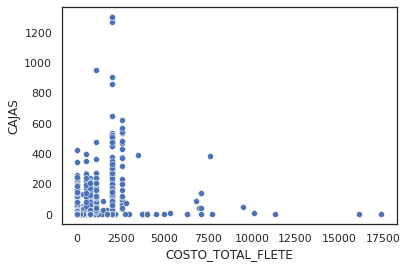

In [ ]:
sns.scatterplot(x=df_irwin_filtered['COSTO_TOTAL_FLETE'], y=df_irwin_filtered['CAJAS']);

In [ ]:
df_irwin_filtered['COSTO_TOTAL_FLETE'].corr(df_irwin_filtered['CAJAS'])

0.32613968145658273

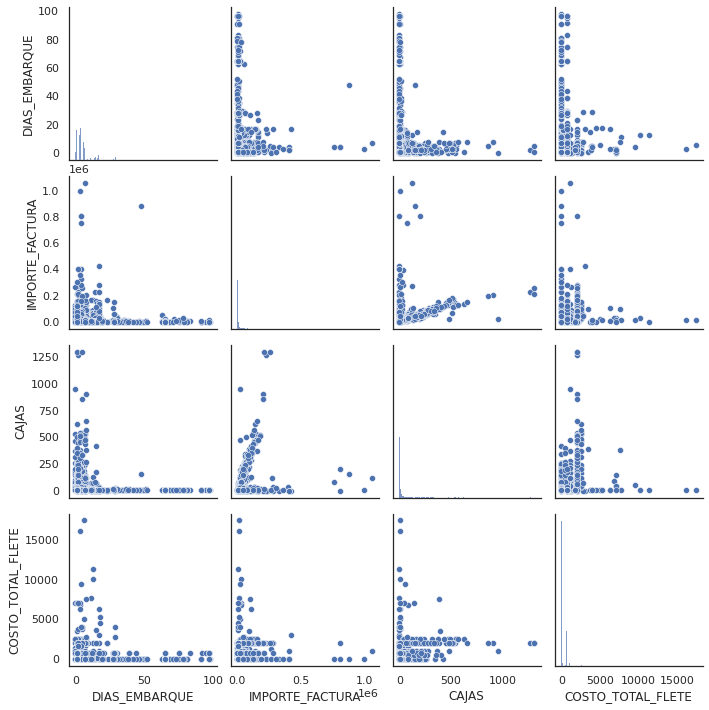

In [ ]:
sns.pairplot(df_irwin_filtered);

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(df_irwin['N_PIEZAS'].to_frame(), df_irwin['IMPORTE_FACTURA'])


LinearRegression()

In [ ]:
y_predict = lr.predict(df_irwin['N_PIEZAS'].to_frame())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


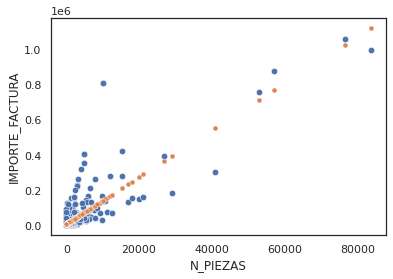

In [ ]:
sns.scatterplot(df_irwin['N_PIEZAS'], df_irwin['IMPORTE_FACTURA'], s=40);
sns.scatterplot(df_irwin['N_PIEZAS'], y=y_predict, s=25);

In [ ]:
df_irwin['N_PIEZAS'].corr(df_irwin['IMPORTE_FACTURA'])

0.8227351095598141

In [ ]:
intercept = lr.intercept_
intercept

7275.23445729633

In [ ]:
coefficient = lr.coef_[0]
coefficient

13.380112917695149

y = 13.380112917695149 * x + 7275.23445729633

In [ ]:
np.power(df_irwin['N_PIEZAS'].corr(df_irwin['IMPORTE_FACTURA']), 2)

0.6768930605023993

## Distribuciones muestrales de estadísticas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_irwin.head(5)

,GUIA,FECHA_DE_PEDIDO,FECHA_DE_EMBARQUE,DIAS_EMBARQUE,A_TIEMPO,ID_PEDIDO,FACTURA,IMPORTE_FACTURA,CLIENTE,COSIGNADO,...,COSTO_TOTAL_FLETE,TIPO_FLETE,NEGOCIO,LINEA_TRANSPORTE,STATUS,MES,UBICACION,CIUDAD,ESTADO,RUTA
37,2529,2006-01-04,2006-01-06,2,1,65954,409622,17615,NUEVA WAL MART,CRUCE DE ANDEN,...,0.0,LOCAL,IRWIN,TRANSPORTES TIGRE,ENTREGADO,2006-01-01,Centro,CUAUTITLAN,EDO DE MEXICO,Local
38,2529,2006-01-04,2006-01-06,2,1,65947,409621,21942,NUEVA WAL MART,CRUCE DE ANDEN,...,0.0,LOCAL,IRWIN,TRANSPORTES TIGRE,ENTREGADO,2006-01-01,Centro,CUAUTITLAN,EDO DE MEXICO,Local
39,2529,2006-01-04,2006-01-06,2,1,65950,409614,19262,NUEVA WAL MART,CRUCE DE ANDEN,...,0.0,LOCAL,IRWIN,TRANSPORTES TIGRE,ENTREGADO,2006-01-01,Centro,CUAUTITLAN,EDO DE MEXICO,Local
40,2529,2006-01-04,2006-01-06,2,1,65949,409602,6797,NUEVA WAL MART,CRUCE DE ANDEN,...,0.0,LOCAL,IRWIN,TRANSPORTES TIGRE,ENTREGADO,2006-01-01,Centro,CUAUTITLAN,EDO DE MEXICO,Local
41,2529,2006-01-04,2006-01-06,2,1,65951,409603,439,NUEVA WAL MART,CRUCE DE ANDEN,...,0.0,LOCAL,IRWIN,TRANSPORTES TIGRE,ENTREGADO,2006-01-01,Centro,CUAUTITLAN,EDO DE MEXICO,Local


In [ ]:
df_irwin['DIAS_EMBARQUE'].mean()

10.689826302729529

In [ ]:
df_irwin['DIAS_EMBARQUE'].std()

15.53468542862899

In [ ]:
df_irwin['DIAS_EMBARQUE'].sample(n=20, replace=False)

368      4
3344     1
3541     2
3573     1
3456     3
1892    15
1107    11
342      3
410      2
2760     6
559     18
1887    15
1982    29
2726     0
2836    91
386      4
1190     4
3845     4
2002    29
3963     4
Name: DIAS_EMBARQUE, dtype: int64

In [ ]:
dias_embarque_irwin = df_irwin['DIAS_EMBARQUE']

In [ ]:
means = []
for i in range(100_000):
  sample = dias_embarque_irwin.sample(n=10, replace=True)
  means.append(sample.mean())

In [ ]:
serie_irwin = pd.Series(means)

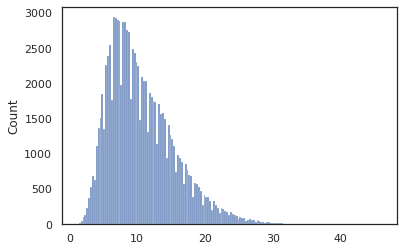

In [ ]:
sns.histplot(data=serie_irwin);

Teorema del limite central

In [ ]:
serie_irwin.skew()

0.9957993083132173

In [ ]:
serie_irwin.kurtosis()

1.1938011570936538

Error estándar

In [ ]:
serie_irwin.std()

4.931876669022563

In [ ]:
serie_irwin.min()

1.1

In [ ]:
serie_irwin.max()

46.0

In [ ]:
serie_irwin.max() - serie_irwin.min()

44.9

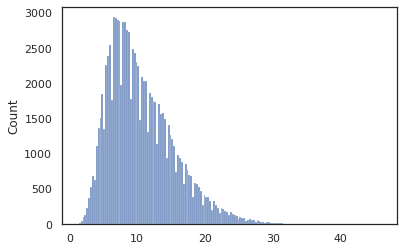

In [ ]:
sns.histplot(data=serie_irwin);

Intervalos de confianza

In [ ]:
limite_inferior = serie_irwin.quantile(0.025)
limite_superior = serie_irwin.quantile(0.975)

In [ ]:
f"Intervalo de 95% de confianza de: {limite_inferior} < {dias_embarque_irwin.mean()} < {limite_superior}"

'Intervalo de 95% de confianza de: 3.8 < 10.689826302729529 < 22.5'

In [ ]:
promedio_de_intervalos = ((dias_embarque_irwin.mean() - limite_inferior) + (limite_superior - dias_embarque_irwin.mean())) / 2
f"Intervalo de 95% de confianza de: {dias_embarque_irwin.mean():.2f} +/- {promedio_de_intervalos:.2f}"

'Intervalo de 95% de confianza de: 10.69 +/- 9.35'

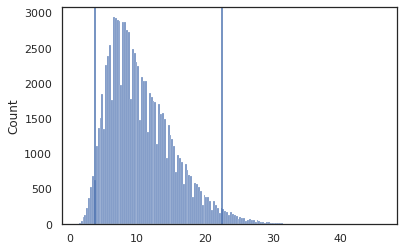

In [ ]:
sns.histplot(data=serie_irwin);
plt.axvline(limite_inferior)
plt.axvline(limite_superior);

## Gráficas

Histograma

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

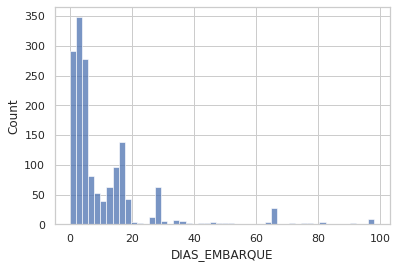

In [ ]:
sns.set_style("whitegrid")

sns.histplot(df_irwin['DIAS_EMBARQUE'], bins=50);

Treemaps

In [ ]:
from IPython.display import Image

In [ ]:
import plotly.express as px

In [ ]:
df_irwin.head(3)

,GUIA,FECHA_DE_PEDIDO,FECHA_DE_EMBARQUE,DIAS_EMBARQUE,A_TIEMPO,ID_PEDIDO,FACTURA,IMPORTE_FACTURA,CLIENTE,COSIGNADO,...,COSTO_TOTAL_FLETE,TIPO_FLETE,NEGOCIO,LINEA_TRANSPORTE,STATUS,MES,UBICACION,CIUDAD,ESTADO,RUTA
37,2529,2006-01-04,2006-01-06,2,1,65954,409622,17615,NUEVA WAL MART,CRUCE DE ANDEN,...,0.0,LOCAL,IRWIN,TRANSPORTES TIGRE,ENTREGADO,2006-01-01,Centro,CUAUTITLAN,EDO DE MEXICO,Local
38,2529,2006-01-04,2006-01-06,2,1,65947,409621,21942,NUEVA WAL MART,CRUCE DE ANDEN,...,0.0,LOCAL,IRWIN,TRANSPORTES TIGRE,ENTREGADO,2006-01-01,Centro,CUAUTITLAN,EDO DE MEXICO,Local
39,2529,2006-01-04,2006-01-06,2,1,65950,409614,19262,NUEVA WAL MART,CRUCE DE ANDEN,...,0.0,LOCAL,IRWIN,TRANSPORTES TIGRE,ENTREGADO,2006-01-01,Centro,CUAUTITLAN,EDO DE MEXICO,Local


In [ ]:
df_grouped = df_irwin.groupby("CLIENTE")[['ESTADO', 'CIUDAD','LINEA_TRANSPORTE','UBICACION']].max()

In [ ]:
df_grouped.head()

,ESTADO,CIUDAD,LINEA_TRANSPORTE,UBICACION
CLIENTE,,,,
ABASTECEDORA DE SOLDADURAS,NUEVO LEON,MONTERREY,TRANSPORTES VALENCIA,Norte
ACEROS TUCAN,EDO DE MEXICO,LOS REYES,TRANSPORTES MARSA,Centro
ACEROS Y REFACC Y HTAS,COAHUILA,TORREON,TRANSPORTES ORTIZ,Norte
ALBERTO MOLINA,CHIAPAS,TUXTLA GTZ,TRANSPORTES CORTES,Sur
ALBERTO ROMERO VALADEZ,CD MEXICO,MEXICO,TRANSPORTES ZEPEDA,Centro


In [ ]:
df_grouped['count'] = 1

In [ ]:
df_grouped

,ESTADO,CIUDAD,LINEA_TRANSPORTE,UBICACION,count
CLIENTE,,,,,
ABASTECEDORA DE SOLDADURAS,NUEVO LEON,MONTERREY,TRANSPORTES VALENCIA,Norte,1
ACEROS TUCAN,EDO DE MEXICO,LOS REYES,TRANSPORTES MARSA,Centro,1
ACEROS Y REFACC Y HTAS,COAHUILA,TORREON,TRANSPORTES ORTIZ,Norte,1
ALBERTO MOLINA,CHIAPAS,TUXTLA GTZ,TRANSPORTES CORTES,Sur,1
ALBERTO ROMERO VALADEZ,CD MEXICO,MEXICO,TRANSPORTES ZEPEDA,Centro,1
...,...,...,...,...,...
TORNILLOS Y TUERCAS,CHIHUAHUA,CHIHUAHUA,TRANSPORTES MARSA,Norte,1
TRAVERS TOOL,QUERETARO,QUERETARO,TRANSPORTES ZEPEDA,Centro,1
VAZQUEZ MENDOZA,GUANAJUATO,MEXICO,TRANSPORTES ZEPEDA,Centro,1


In [ ]:
fig = px.treemap(df_grouped, path=['ESTADO', 'CIUDAD','LINEA_TRANSPORTE', 'UBICACION'], values='count')

fig.show()

In [ ]:
df_grouped = df_irwin.groupby("GUIA")[['CLIENTE', 'DIAS_EMBARQUE', 'N_PIEZAS','IMPORTE_FACTURA','ESTADO','LINEA_TRANSPORTE','TIPO_UNIDAD']].max()

In [ ]:
cd_mexico = df_grouped[df_grouped['ESTADO'] == 'CD MEXICO']
cd_mexico.head(5)

,CLIENTE,DIAS_EMBARQUE,N_PIEZAS,IMPORTE_FACTURA,ESTADO,LINEA_TRANSPORTE,TIPO_UNIDAD
GUIA,,,,,,,
1409,LEON WEILL,4,320,25900,CD MEXICO,TRANSPORTES SANCHEZ,CAMIONETA
1412,HOME DEPOT,3,362,14104,CD MEXICO,TRANSPORTES RODRIGUEZ,CAMIONETA
1442,FERRETERIA LA LIBRA,28,2826,59891,CD MEXICO,TRANSPORTES CORTES,CAMIONETA
1443,FERRETERIA LA LIBRA,28,4593,102586,CD MEXICO,TRANSPORTES MEJIA,CAMIONETA
1449,TORNIHERRAMIENTAS AUTOMOTRIZ,5,681,18689,CD MEXICO,TRANSPORTES OLIVARES,CAMIONETA


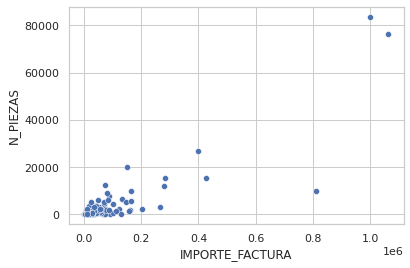

In [ ]:
sns.scatterplot(x=cd_mexico['IMPORTE_FACTURA'], y=cd_mexico['N_PIEZAS']);

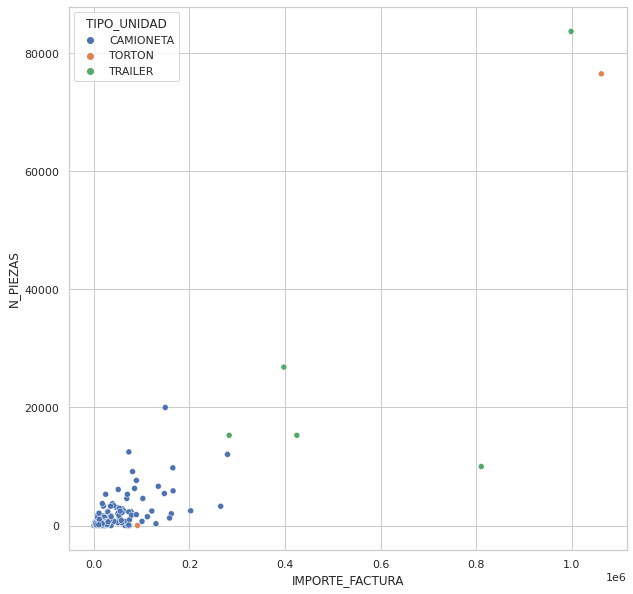

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=cd_mexico['IMPORTE_FACTURA'], y=cd_mexico['N_PIEZAS'], hue=cd_mexico['TIPO_UNIDAD']);

## Procesamiento de Lenguaje Natural

In [ ]:
import nltk
import numpy as np

In [ ]:
df.head(3)

NEGOCIO
HOGAR                VARGAS
IRWIN    TRANSPORTES ZEPEDA
Name: LINEA_TRANSPORTE, dtype: object

In [ ]:
df_3 = df.groupby('CLIENTE')['LINEA_TRANSPORTE'].max()
df_3.head()

CLIENTE
ABASTECEDORA DE SOLDADURAS    TRANSPORTES VALENCIA
ACEROS TUCAN                     TRANSPORTES MARSA
ACEROS Y REFACC Y HTAS           TRANSPORTES ORTIZ
ALBERTO MOLINA                  TRANSPORTES CORTES
ALBERTO ROMERO VALADEZ          TRANSPORTES ZEPEDA
Name: LINEA_TRANSPORTE, dtype: object

In [ ]:
df_3.str.lower()
df_3

CLIENTE
ABASTECEDORA DE SOLDADURAS    TRANSPORTES VALENCIA
ACEROS TUCAN                     TRANSPORTES MARSA
ACEROS Y REFACC Y HTAS           TRANSPORTES ORTIZ
ALBERTO MOLINA                  TRANSPORTES CORTES
ALBERTO ROMERO VALADEZ          TRANSPORTES ZEPEDA
                                      ...         
TRAVERS  TOOL                   TRANSPORTES ZEPEDA
VAZQUEZ MENDOZA                 TRANSPORTES ZEPEDA
VICTOR SANCHEZ                   TRANSPORTES ORTIZ
VILCHES FERRETEROS              TRANSPORTES ZEPEDA
ZIMAG                              CLIENTE RECOGE 
Name: LINEA_TRANSPORTE, Length: 202, dtype: object

In [ ]:
df_3.str.strip()
df_3

CLIENTE
ABASTECEDORA DE SOLDADURAS    TRANSPORTES VALENCIA
ACEROS TUCAN                     TRANSPORTES MARSA
ACEROS Y REFACC Y HTAS           TRANSPORTES ORTIZ
ALBERTO MOLINA                  TRANSPORTES CORTES
ALBERTO ROMERO VALADEZ          TRANSPORTES ZEPEDA
                                      ...         
TRAVERS  TOOL                   TRANSPORTES ZEPEDA
VAZQUEZ MENDOZA                 TRANSPORTES ZEPEDA
VICTOR SANCHEZ                   TRANSPORTES ORTIZ
VILCHES FERRETEROS              TRANSPORTES ZEPEDA
ZIMAG                              CLIENTE RECOGE 
Name: LINEA_TRANSPORTE, Length: 202, dtype: object

In [ ]:
df_3 = df_3.str.replace('TRANSPORTES', '')
df_3

CLIENTE
ABASTECEDORA DE SOLDADURAS           VALENCIA
ACEROS TUCAN                            MARSA
ACEROS Y REFACC Y HTAS                  ORTIZ
ALBERTO MOLINA                         CORTES
ALBERTO ROMERO VALADEZ                 ZEPEDA
                                   ...       
TRAVERS  TOOL                          ZEPEDA
VAZQUEZ MENDOZA                        ZEPEDA
VICTOR SANCHEZ                          ORTIZ
VILCHES FERRETEROS                     ZEPEDA
ZIMAG                         CLIENTE RECOGE 
Name: LINEA_TRANSPORTE, Length: 202, dtype: object

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
tokenized = df_3.apply(nltk.word_tokenize)
tokenized

CLIENTE
ABASTECEDORA DE SOLDADURAS           [VALENCIA]
ACEROS TUCAN                            [MARSA]
ACEROS Y REFACC Y HTAS                  [ORTIZ]
ALBERTO MOLINA                         [CORTES]
ALBERTO ROMERO VALADEZ                 [ZEPEDA]
                                    ...        
TRAVERS  TOOL                          [ZEPEDA]
VAZQUEZ MENDOZA                        [ZEPEDA]
VICTOR SANCHEZ                          [ORTIZ]
VILCHES FERRETEROS                     [ZEPEDA]
ZIMAG                         [CLIENTE, RECOGE]
Name: LINEA_TRANSPORTE, Length: 202, dtype: object

In [ ]:
all_words = tokenized.sum()
all_words

['VALENCIA',
 'MARSA',
 'ORTIZ',
 'CORTES',
 'ZEPEDA',
 'OLIVARES',
 'LEDESMA',
 'ZEPEDA',
 'PEREZ',
 'VALENCIA',
 'MEJIA',
 'CLIENTE',
 'RECOGE',
 'CLIENTE',
 'RECOGE',
 'QUINTANAR',
 'QUINTANAR',
 'RUIZ',
 'ZEPEDA',
 'ORTIZ',
 'QUINTANAR',
 'PEREZ',
 'MEJIA',
 'SANCHEZ',
 'SANCHEZ',
 'QUINTANAR',
 'TIGRE',
 'ORTIZ',
 'VALENCIA',
 'OLIVARES',
 'RODRIGUEZ',
 'SANCHEZ',
 'MARSA',
 'OLIVARES',
 'QUINTANAR',
 'OLIVARES',
 'MARSA',
 'MARSA',
 'MARSA',
 'QUINTANAR',
 'SANCHEZ',
 'VARGAS',
 'OLIVARES',
 'OLIVARES',
 'RUIZ',
 'QUINTANAR',
 'QUINTANAR',
 'TIGRE',
 'TIGRE',
 'MEJIA',
 'QUINTANAR',
 'RUIZ',
 'QUINTANAR',
 'ORTIZ',
 'SANCHEZ',
 'QUINTANAR',
 'PEREZ',
 'SANCHEZ',
 'MARSA',
 'ZEPEDA',
 'ORTIZ',
 'SANCHEZ',
 'VALENCIA',
 'QUINTANAR',
 'ZEPEDA',
 'LEDESMA',
 'PEREZ',
 'PARTICULAR',
 'ORTIZ',
 'SANCHEZ',
 'TIGRE',
 'SANCHEZ',
 'VALENCIA',
 'MARSA',
 'TIGRE',
 'PEREZ',
 'PEREZ',
 'RUIZ',
 'ZEPEDA',
 'MARSA',
 'CORTES',
 'OLIVARES',
 'OLIVARES',
 'MARSA',
 'QUINTANAR',
 'SANCHEZ',
 'ORT

In [ ]:
text = nltk.Text(all_words)
text

<Text: VALENCIA MARSA ORTIZ CORTES ZEPEDA OLIVARES LEDESMA ZEPEDA...>

In [ ]:
text.concordance("TIGRE", lines=20)

Displaying 11 of 11 matches:
EREZ MEJIA SANCHEZ SANCHEZ QUINTANAR TIGRE ORTIZ VALENCIA OLIVARES RODRIGUEZ SA
ES OLIVARES RUIZ QUINTANAR QUINTANAR TIGRE TIGRE MEJIA QUINTANAR RUIZ QUINTANAR
VARES RUIZ QUINTANAR QUINTANAR TIGRE TIGRE MEJIA QUINTANAR RUIZ QUINTANAR ORTIZ
DESMA PEREZ PARTICULAR ORTIZ SANCHEZ TIGRE SANCHEZ VALENCIA MARSA TIGRE PEREZ P
SANCHEZ TIGRE SANCHEZ VALENCIA MARSA TIGRE PEREZ PEREZ RUIZ ZEPEDA MARSA CORTES
EPEDA MARSA SANCHEZ RODRIGUEZ ZEPEDA TIGRE CLIENTE RECOGE SANCHEZ TIGRE SANCHEZ
 ZEPEDA TIGRE CLIENTE RECOGE SANCHEZ TIGRE SANCHEZ MARSA PEREZ TIGRE ZEPEDA MAR
GE SANCHEZ TIGRE SANCHEZ MARSA PEREZ TIGRE ZEPEDA MARSA SANCHEZ PEREZ SANDY ZEP
S ORTIZ ZEPEDA ORTIZ OLIVARES ZEPEDA TIGRE SANCHEZ QUINTANAR SANCHEZ MEJIA MARS
JIA CHAVARRIA PEREZ ZEPEDA QUINTANAR TIGRE RUIZ ZEPEDA PEREZ ZEPEDA QUINTANAR O
OLIVARES MEJIA PEREZ QUINTANAR GRCIA TIGRE OLIVARES VALENCIA ZEPEDA SANCHEZ VAL


In [ ]:
text.similar("TIGRE")

quintanar sanchez marsa ortiz zepeda olivares ruiz sandy grcia


In [ ]:
freq_dist = nltk.FreqDist(all_words)

print(freq_dist)

<FreqDist with 21 samples and 207 outcomes>


In [ ]:
freq_dist.most_common(20)

[('SANCHEZ', 34),
 ('ZEPEDA', 24),
 ('MARSA', 22),
 ('QUINTANAR', 21),
 ('OLIVARES', 17),
 ('PEREZ', 14),
 ('ORTIZ', 13),
 ('TIGRE', 11),
 ('VALENCIA', 9),
 ('MEJIA', 9),
 ('RUIZ', 8),
 ('CLIENTE', 5),
 ('RECOGE', 5),
 ('LEDESMA', 4),
 ('CORTES', 3),
 ('RODRIGUEZ', 3),
 ('VARGAS', 1),
 ('PARTICULAR', 1),
 ('SANDY', 1),
 ('CHAVARRIA', 1)]

In [ ]:
import numpy as np

In [ ]:
most_common_20 = list(map(lambda x: list(x), freq_dist.most_common(20)))
most_common_20

[['SANCHEZ', 34],
 ['ZEPEDA', 24],
 ['MARSA', 22],
 ['QUINTANAR', 21],
 ['OLIVARES', 17],
 ['PEREZ', 14],
 ['ORTIZ', 13],
 ['TIGRE', 11],
 ['VALENCIA', 9],
 ['MEJIA', 9],
 ['RUIZ', 8],
 ['CLIENTE', 5],
 ['RECOGE', 5],
 ['LEDESMA', 4],
 ['CORTES', 3],
 ['RODRIGUEZ', 3],
 ['VARGAS', 1],
 ['PARTICULAR', 1],
 ['SANDY', 1],
 ['CHAVARRIA', 1]]

In [ ]:
df_4 = pd.DataFrame(most_common_20, columns=['word', 'count'])
df_4

,word,count
0,SANCHEZ,34
1,ZEPEDA,24
2,MARSA,22
3,QUINTANAR,21
4,OLIVARES,17
5,PEREZ,14
6,ORTIZ,13
7,TIGRE,11
8,VALENCIA,9
9,MEJIA,9


<Figure size 720x720 with 0 Axes>

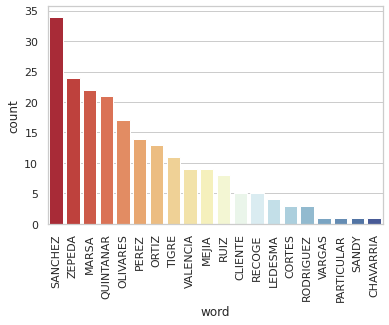

In [ ]:
plt.figure(figsize=(10, 10))
fig = plt.figure()
ax = fig.add_subplot()

sns.barplot(x=df_4['word'], y=df_4['count'], ax=ax, palette="RdYlBu")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

In [ ]:
df_irwin.groupby('UBICACION')['TIPO_UNIDAD'].value_counts()

UBICACION  TIPO_UNIDAD
Centro     CAMIONETA      1274
           TRAILER         162
           TORTON           44
Norte      CAMIONETA        60
           TORTON            9
           TRAILER           8
Sur        CAMIONETA        49
           TORTON            5
           MUDANZA           1
Name: TIPO_UNIDAD, dtype: int64

In [ ]:
df_irwin.groupby(['UBICACION', 'ESTADO'])['COSTO_TOTAL_FLETE'].sum()

UBICACION  ESTADO             
Centro     CD MEXICO              170141.91
           EDO DE MEXICO          146144.38
           GUANAJUATO              20750.00
           JALISCO                     0.00
           MICHOACAN                   0.00
           QUERETARO                4750.00
           SAN LUIS POTOSI          7050.00
Norte      B. C.                       0.00
           BAJA CALIFORNIA SUR         0.00
           CHIHUAHUA                3568.54
           COAHUILA                11776.54
           DURANGO                   160.00
           NUEVO LEON              16758.00
           SINALOA                 17400.00
           SONORA                  16380.00
           TAMAULIPAS              14292.79
Sur        CAMPECHE                  230.00
           CHIAPAS                   460.00
           GUERRERO                  750.00
           MORELOS                  7266.19
           OAXACA                   1500.00
           PUEBLA                    835.00
 

In [ ]:
df_irwin.groupby('UBICACION')['DIAS_EMBARQUE'].agg(['mean', 'std'])

,mean,std
UBICACION,,
Centro,10.655405,15.42480
Norte,13.233766,19.76633
Sur,8.054545,10.81052
